In [1]:
import random

%run linearSearch.py
%run binarySearch.py

In [2]:
# Esta función recibe el tamaño deseado de la lista en la que buscar y un número de veces que desea repetir la búsqueda.
#
# Se crea una lista aleatoria de tamaño 'array_size' y se realiza la búsqueda de un elemento aleatorio de ella aplciando
# dos algoritmos de búsqueda diferentes: búsqueda lineal y búsqueda binaria
# Se guardan los pasos necesarios para encontrar el elemento con cada algoritmo. Adicionalmente, para la búsqueda binaria se
# guardan también los pasos únicamente de la búsqueda y no del ordenamiento necesario para sacar los pasos necesarios que 
# se hubieran necesitado si la lista hubiera estado ordenada de menor a mayor.
#
# Se realiza tantas veces como 'num_samples' y se devuelven los pasos de la iteración que más pasos ha necesitado.
def getMaxSteps(array_size, num_samples):
    linearS_steps = []
    binaryS_steps = []
    binaryS_steps_ordered = []

    for i in range(0, num_samples):
        our_list = random.sample(range(0, 100000), array_size)
        num_to_find = our_list[random.randint(0,len(our_list)-1)]

        linearS_steps.append(LinearSearch(our_list, num_to_find).counter)
        binaryS_steps_ordered.append(BinarySearch(our_list, num_to_find).counter)
        binaryS_steps.append(BinarySearch(our_list, num_to_find).counter + BinarySearch(our_list, num_to_find).moves_to_sort)
        
    return {
        'linear_steps': max(linearS_steps),
        'binary_steps': max(binaryS_steps),
        'binary_steps_ordered': max(binaryS_steps_ordered)
    }

## 10 tests con listas de tamaños entre 100 y 1000

In [3]:
length_tests = (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000)

linear = []
binary = []
binary_ordered = []

for list_length in length_tests:
    
    max_steps = getMaxSteps(list_length, 100)
    
    linear.append(max_steps['linear_steps'])
    binary.append(max_steps['binary_steps'])
    binary_ordered.append(max_steps['binary_steps_ordered'])

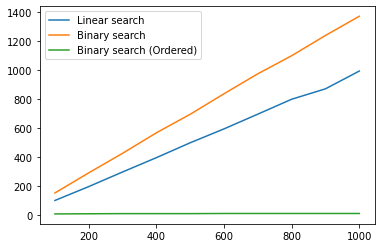

In [4]:
import matplotlib.pyplot as plt
import numpy as np
  
plt.plot(length_tests, linear, label = "Linear search")
plt.plot(length_tests, binary, label = "Binary search")
plt.plot(length_tests, binary_ordered, label = "Binary search (Ordered)")

plt.legend()
plt.show()

## 10 tests con listas de tamaños entre 10 000 y 100 000
Tarda bastante en ejecutarse todos los tests.

In [5]:
length_tests = (10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000)

linear = []
binary = []
binary_ordered = []

for list_length in length_tests:
    
    max_steps = getMaxSteps(list_length, 50)
    
    linear.append(max_steps['linear_steps'])
    binary.append(max_steps['binary_steps'])
    binary_ordered.append(max_steps['binary_steps_ordered'])

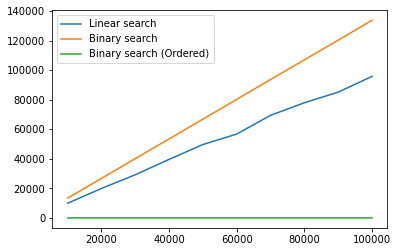

In [6]:
import matplotlib.pyplot as plt
import numpy as np
  
plt.plot(length_tests, linear, label = "Linear search")
plt.plot(length_tests, binary, label = "Binary search")
plt.plot(length_tests, binary_ordered, label = "Binary search (Ordered)")

plt.legend()
plt.show()

## Conclusiones

La búsqueda binaria necesita tener una lista ordenada para poder ser aplicada. Si no se tiene garantia de que la lista esté ordenada habrá que aplicar previamente un algoritmo de ordenación, lo que necesariamente va a resultar en un aumento de la cumplejidad de aplicar el algoritmo de la búsqueda binaria. Cúanto aumenta dependerá del algoritmo de ordenación elegido, que en este caso ha sido Quicksort.

Los resultados muestran que tanto la búsqueda lineal como la búsqueda binaria presentan una complejidad lineal O(n). Al menos, utilizando el algoritmo de ordenación Quicksort para la búqueda binaria.

Para listas no ordenadas es más optimo utilizar el algoritmo de búsqueda lineal aunque tampoco hay muchísima diferencia entre los dos. Eso sí, para listas que están ya previamente ordenadas es mucho más optimo aplicar la búsqueda binaria, especialmente en auquellos casos en los que la lista tiene muchos elementos.

